In [1]:
import cv2
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt
from skimage.io import imread_collection
from sklearn.metrics import f1_score
from scipy.ndimage import generic_filter

In [11]:
def filtro_pto_medio(A):
    S= 0.5*( np.max(A.flatten()) +  np.min(A.flatten())) 
    return S

In [15]:
def clausura(im):
  R, G, B = cv2.split(im)

  kernel= cv2.getStructuringElement(cv2.MORPH_CROSS, (12,12))
  
  R_ero = cv2.dilate(R,kernel)
  R_ape = cv2.erode(R_ero,kernel)

  G_ero = cv2.dilate(G,kernel)
  G_ape = cv2.erode(G_ero,kernel)

  B_ero = cv2.dilate(B,kernel)
  B_ape = cv2.erode(B_ero,kernel)
  
  im_clausura = cv2.merge([R_ape, R_ape, R_ape])

  return im_clausura

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def f_score(bin, gt2):
  #binarizamos
  bin_gt = ((bin>1)*1).astype('int')
  
  output = ((gt2>1)*1).astype('int')

  diferencia= bin_gt*2 - output

  x, y= np.where(diferencia ==-1)
  FP = len(x)
  #print(FP)
  x, y= np.where(diferencia == 1)
  TP = len(x)
  #print(TP)

  x, y= np.where(diferencia == 2)
  FN = len(x)
  #print(FN)

  x, y= np.where(diferencia == 0)
  TN = len(x)
  #print(TN)

  R= TP/(FN+TP)
  P= TP/(TP+FP)
  RP = R+P
  if  RP== 0:
      f_score = 0
      f_media.append(f_score)
  else:  
      f_score= 2* (R*P)/RP
      print(f_score)
      f_media.append(f_score)



In [5]:
def outsu(img):
    
    bns= np.linspace(0,255,256,dtype='uint8')
    h, bins = np.histogram(img, bins=bns)
    P = h/np.sum(h)
    
    q1  = np.zeros([255])
    q2  = np.zeros([255])
    mu1 = np.zeros([255])
    mu2 = np.zeros([255])
    va1 = np.zeros([255])
    va2 = np.zeros([255])
    #plt.figure()

    for t in range(1,255):
        iL= np.linspace(0,t-1,t,dtype='uint8')
        iR= np.linspace(t,254,255-t,dtype='uint8')
        
        q1[t]=np.sum(P[iL])+0.00001
        q2[t]=np.sum(P[iR])+0.00001
        mu1[t]= np.sum(iL*P[iL]/q1[t])
        mu2[t]= np.sum(iR*P[iR]/q2[t])

        va1[t]= np.sum((iL-mu1[t])**2* (P[iL]/ q1[t]))
        va2[t]= np.sum((iR-mu2[t])**2* (P[iR]/ q2[t]))
        #plt.plot(q1*va1 + q2*va2, color='red', alpha=0.4)
        
        #plt.pause(0.1)
        #plt.draw()

    #plt.show()
    vartotal= q1*va1 + q2*va2
    level=np.argmin(vartotal[1:255])
    return level

In [13]:
def algoritmo(nombre):
    #filtramos con clausura

    output = clausura(nombre)
    output = cv2.cvtColor(output,cv2.COLOR_BGR2GRAY)
    output= generic_filter(output,filtro_pto_medio, [10,10])
    #imagen filtrada
    plt.figure(figsize=(10,10))
    plt.imshow(output, cmap='gray')

    #realizamos segmentacion
    level = outsu(output)
    ret, bin = cv2.threshold(output, level, 255,type=cv2.THRESH_BINARY)

    #para invertir la imagen
    bin = cv2.bitwise_not(bin)

    return bin

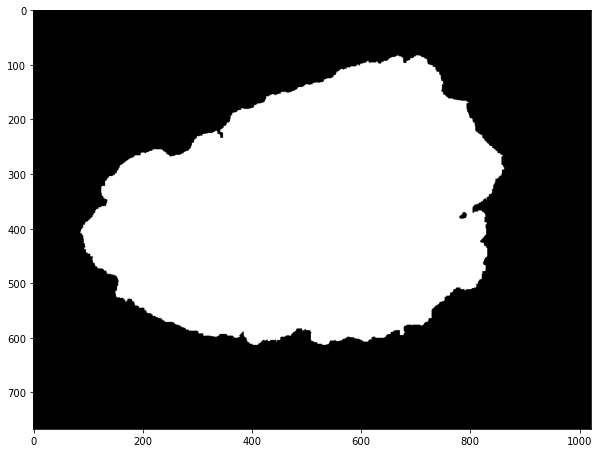

1
0.8726200534102722


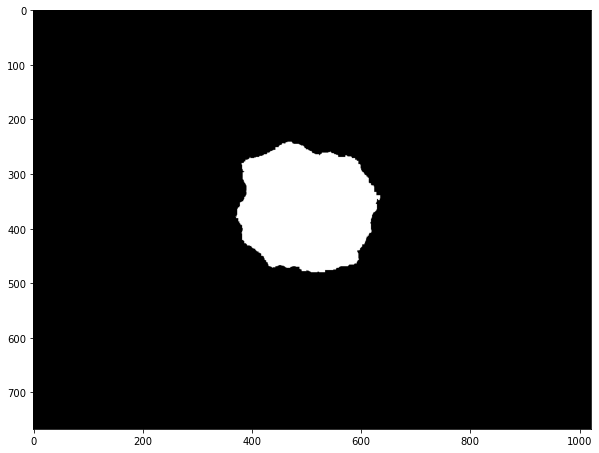

2
0.9338098414183746


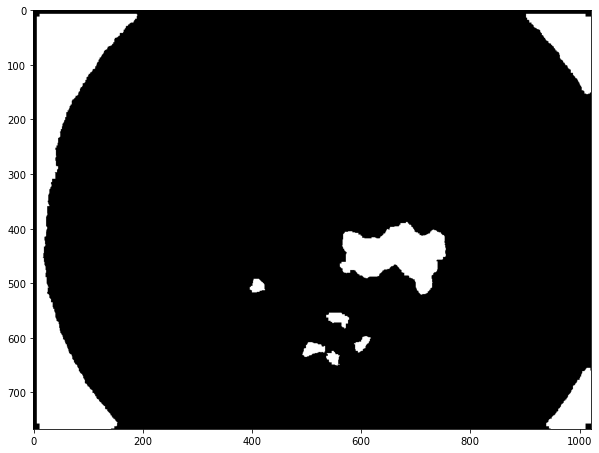

3
0.11018082703446186


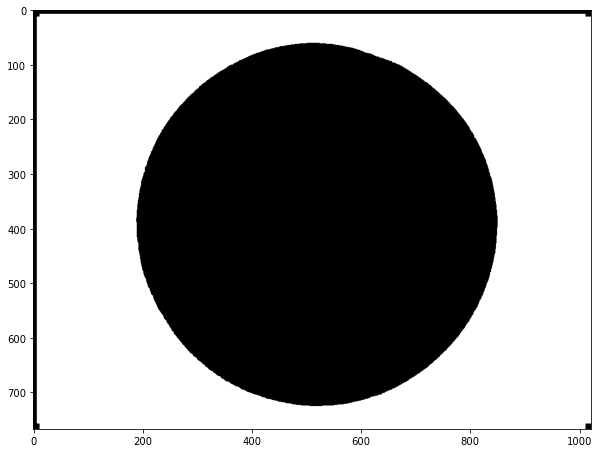

4
0.021360180998070157


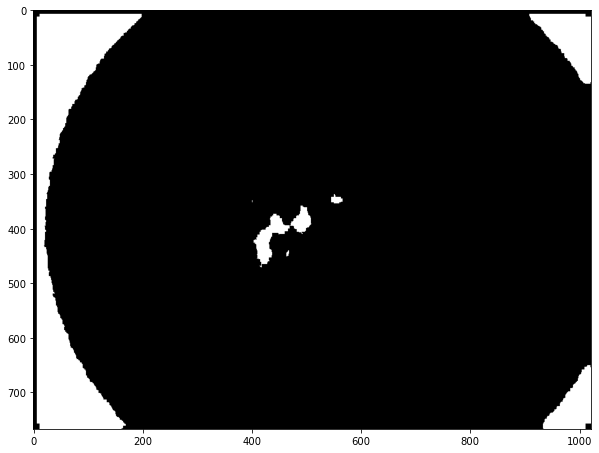

5
0.05420011010982006


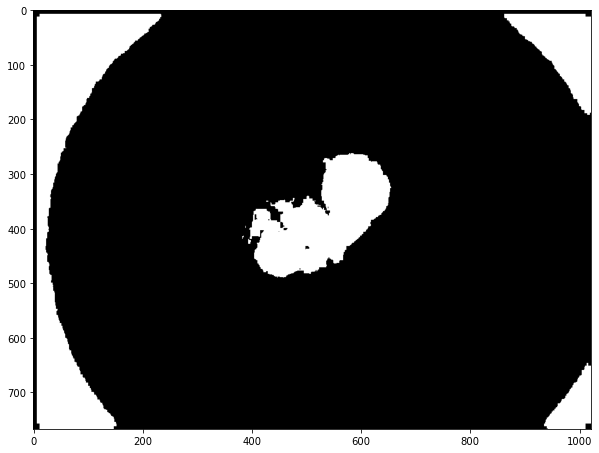

6
0.3676087030157959


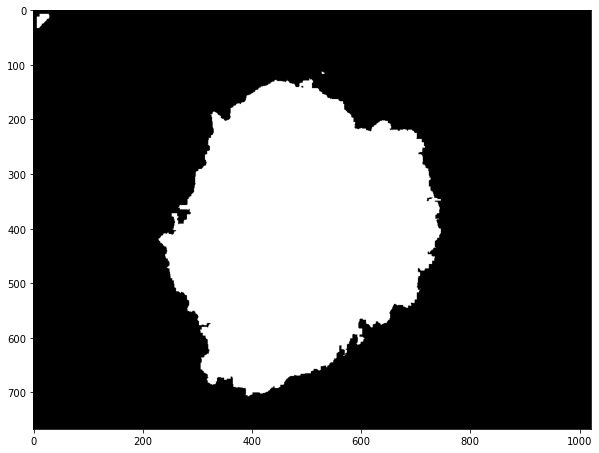

7
0.861148795547439


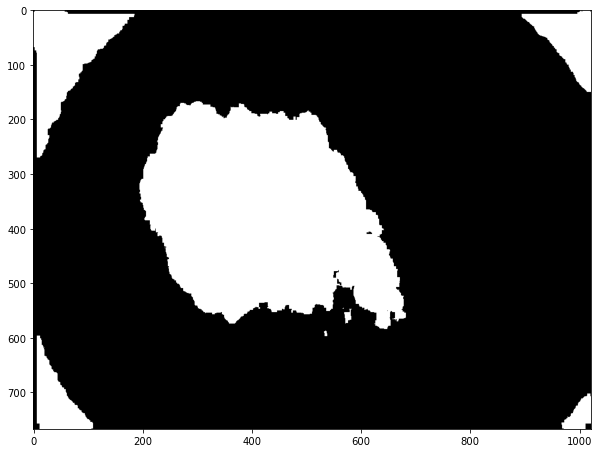

8
0.775830359017426


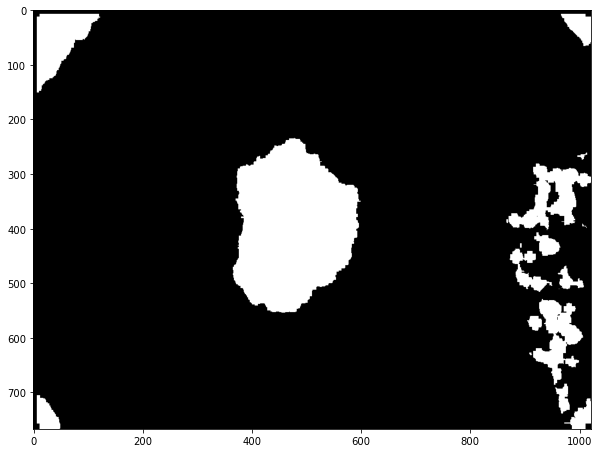

9
0.7111030658970079


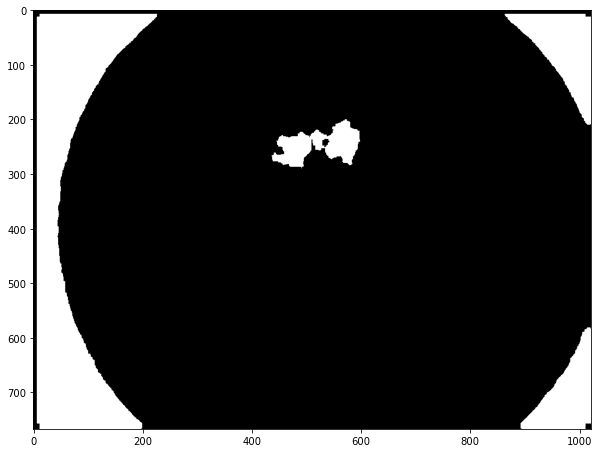

10
0.05956180062505669


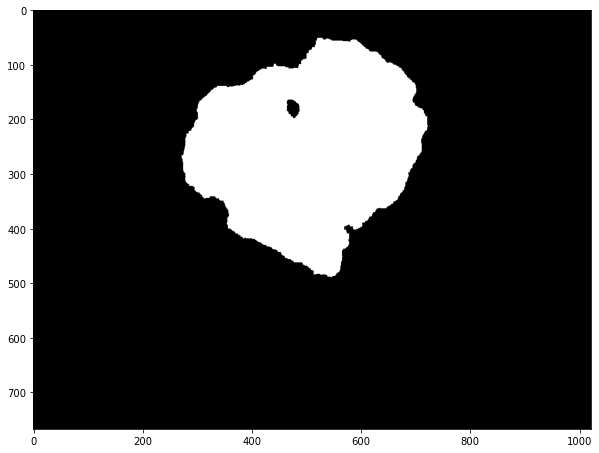

11
0.8747583588641296


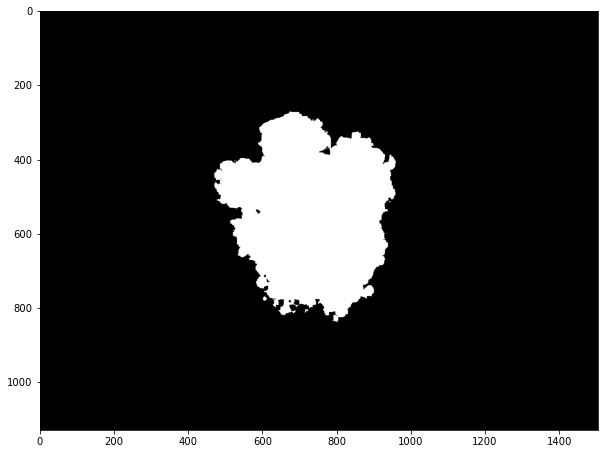

12
0.8244722153708424


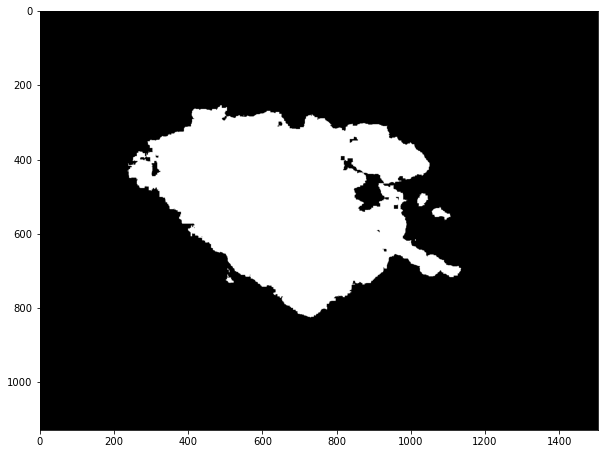

13
0.8273032872229659


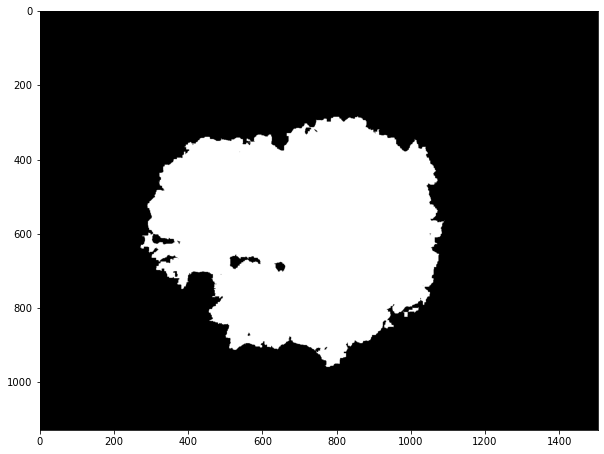

14
0.8131368995530874


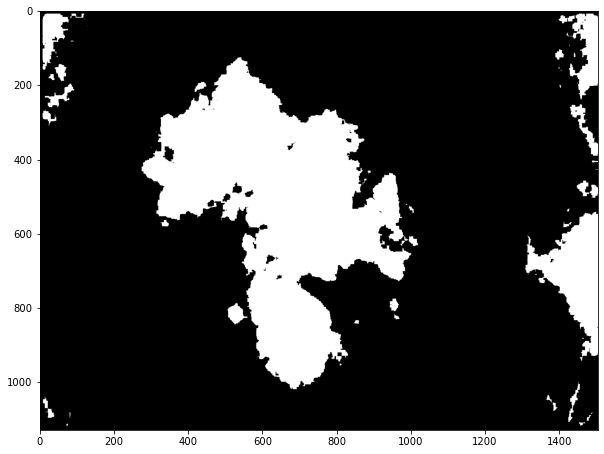

15
0.7474474292357578


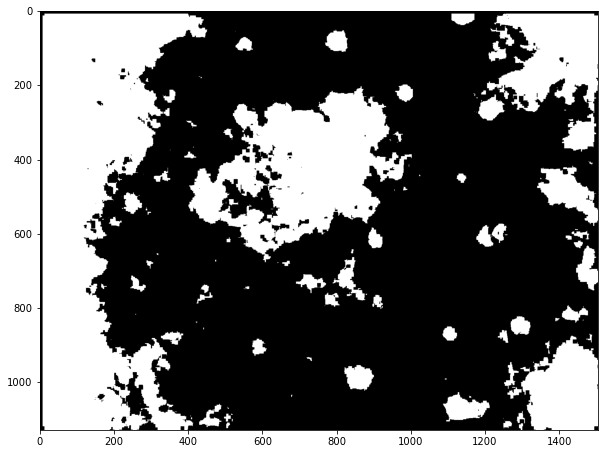

16
0.27011241825939747


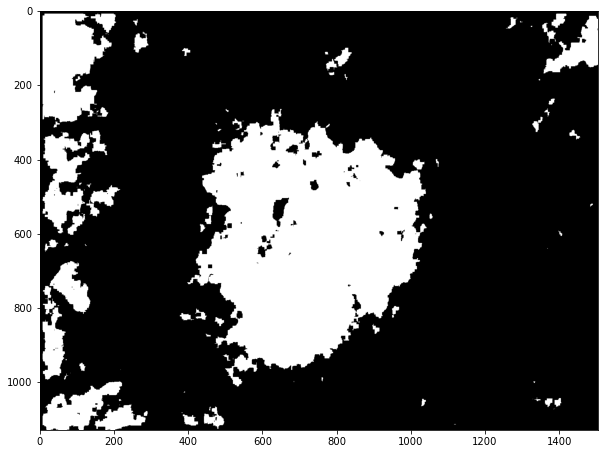

17
0.7640961532378623


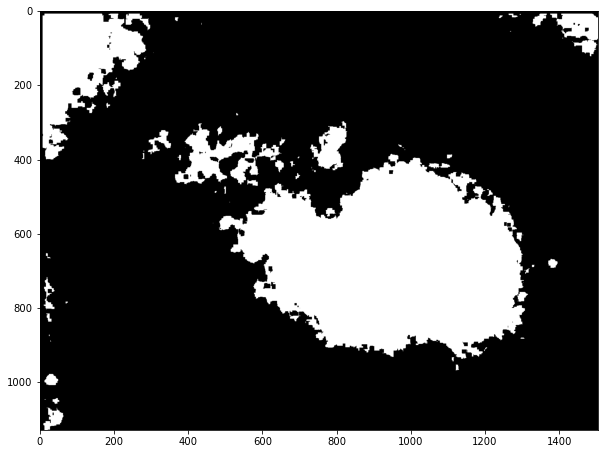

18
0.49096722065651477


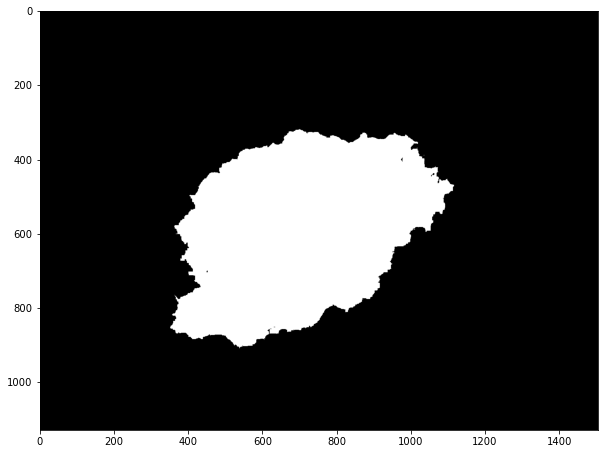

19
0.8437507207602002


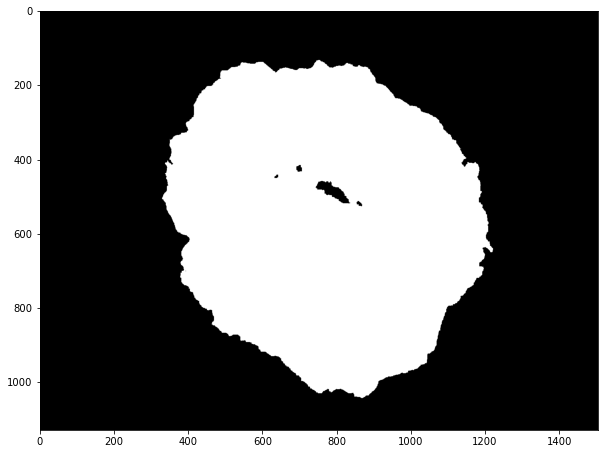

20
0.9386954101628556


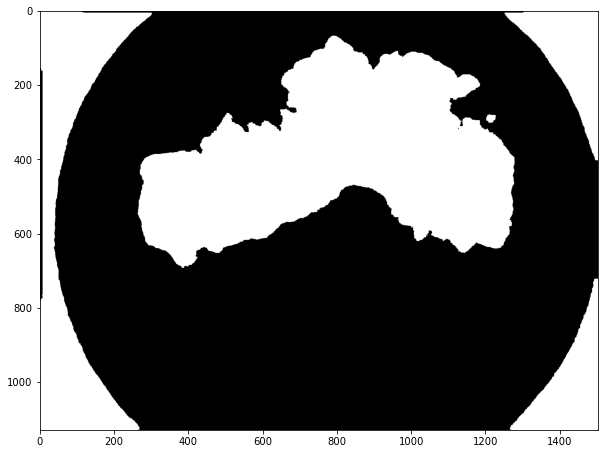

21
0.5104082586346064


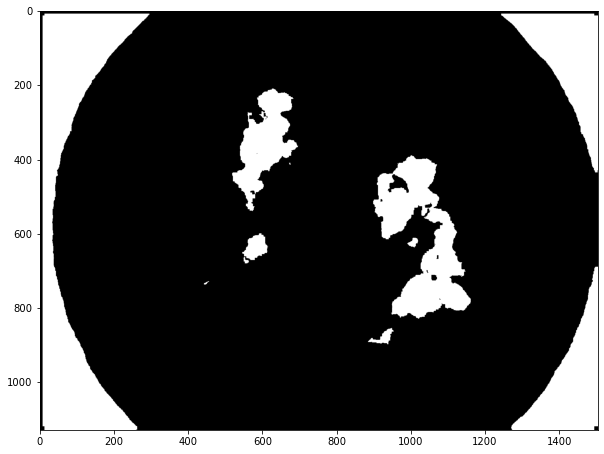

22
0.19672385739987241


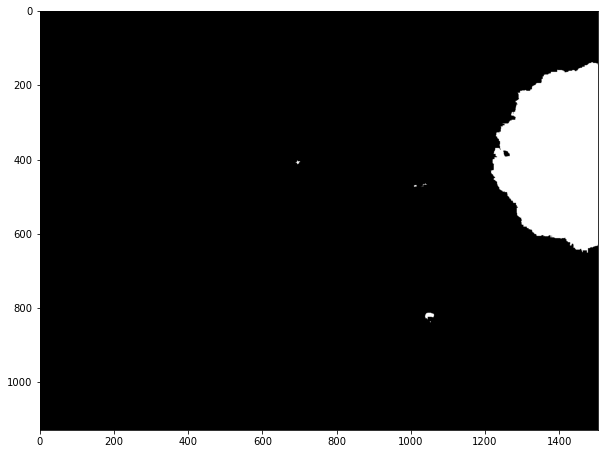

23
0.0011125594429986182


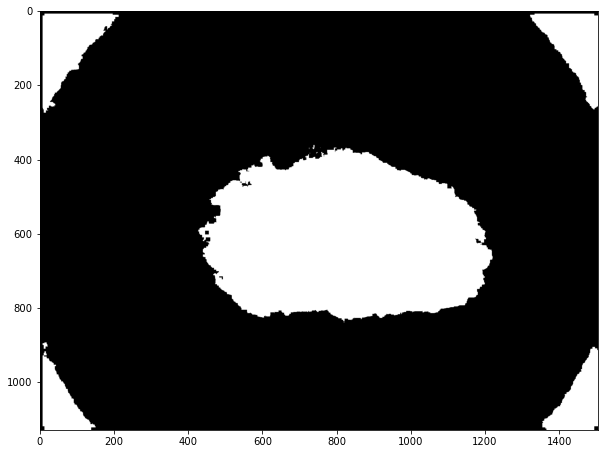

24
0.7838222980461858


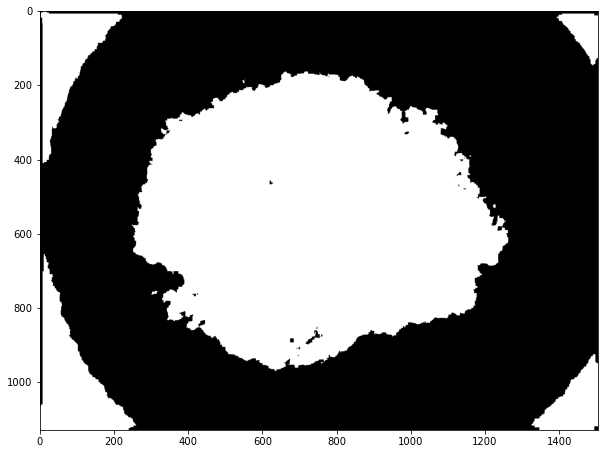

25
0.7751350664729877


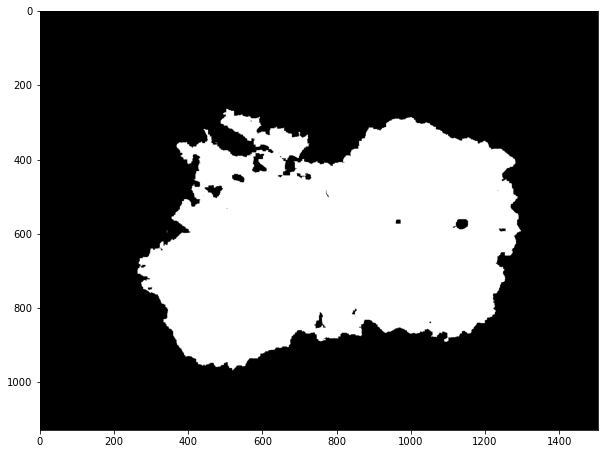

26
0.7088634828545858


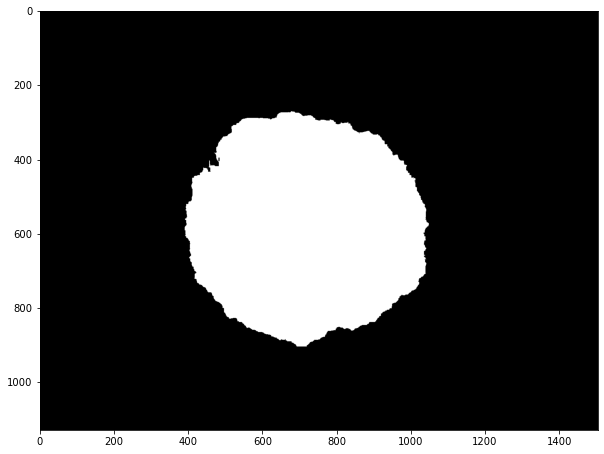

27
0.9134073021665366


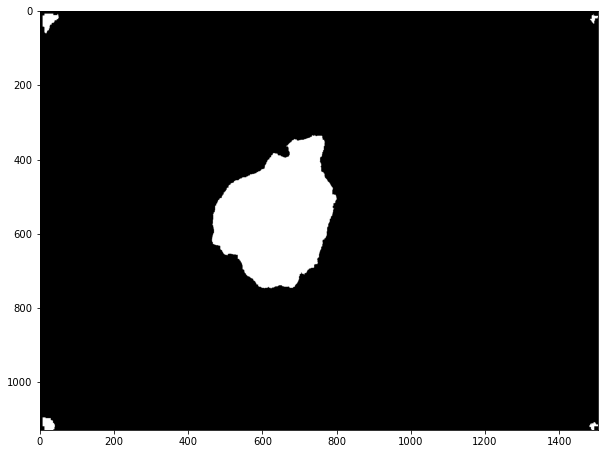

28
0.8643013494335264


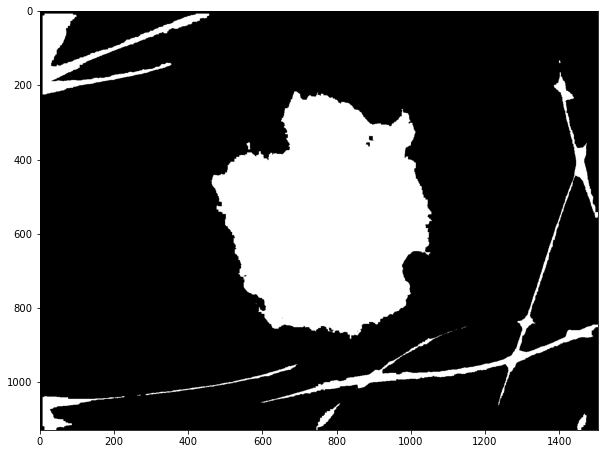

29
0.613436302808473


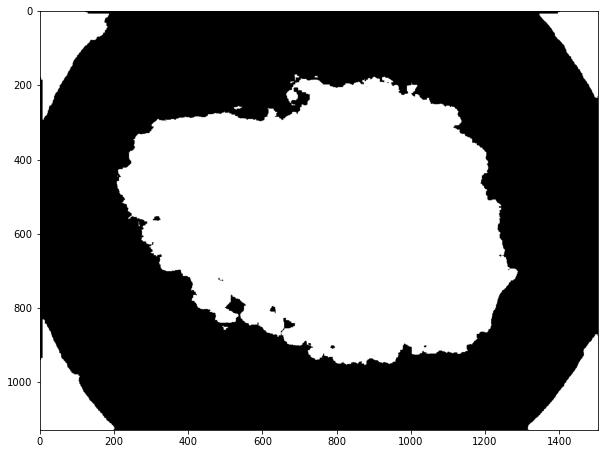

30
0.7595226197506668


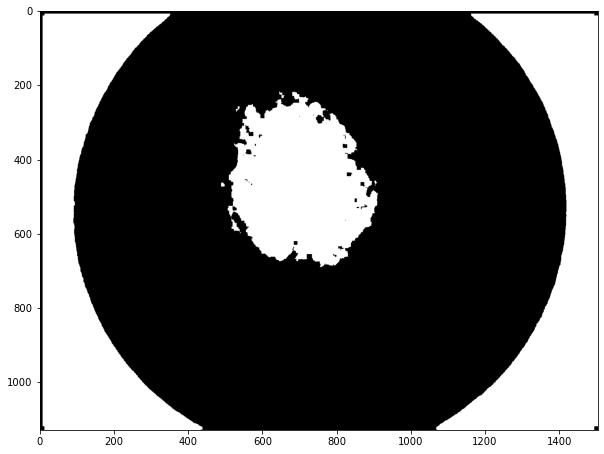

31
0.24013521042356256


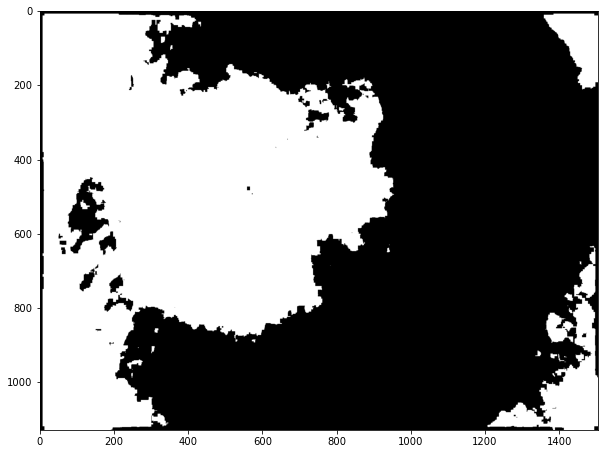

32
0.5796895682203046


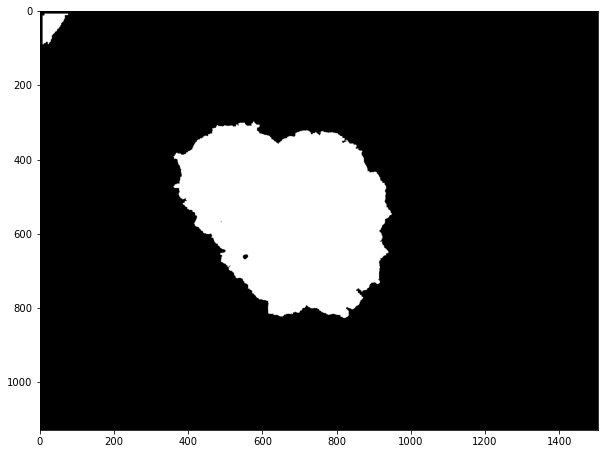

33
0.6807221131390429


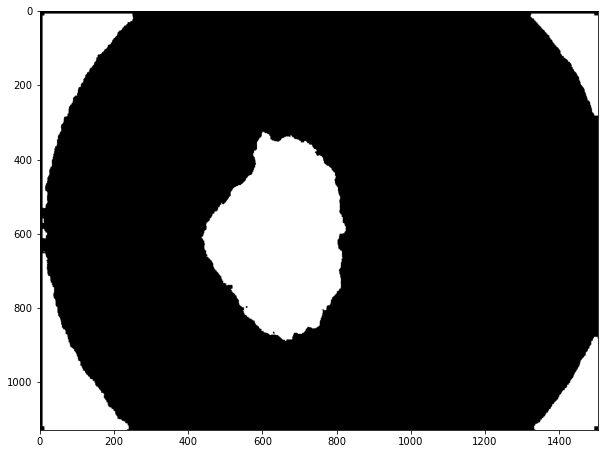

34
0.5880006119014839


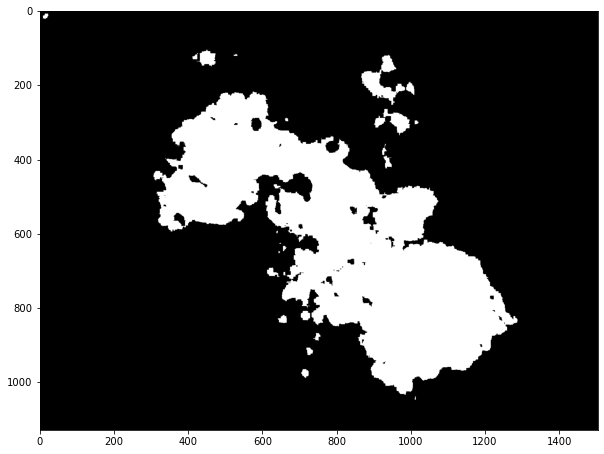

35
0.45726664396118616


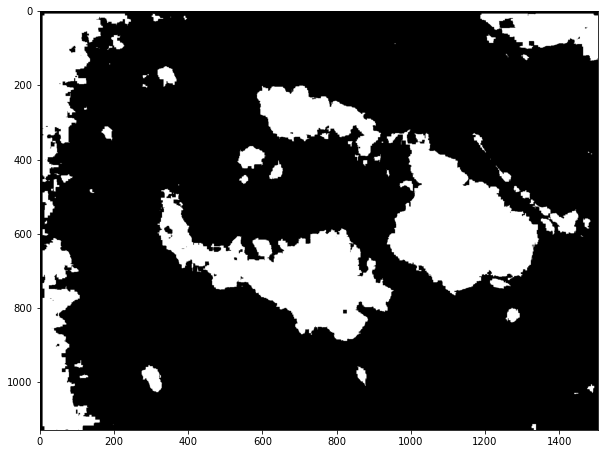

36
0.5474126647258152


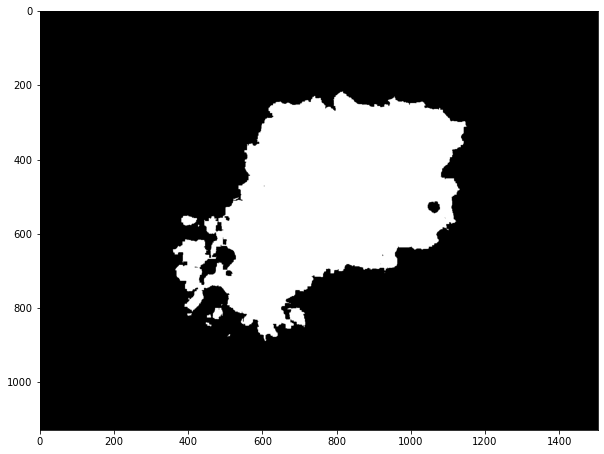

37
0.7503119050037637


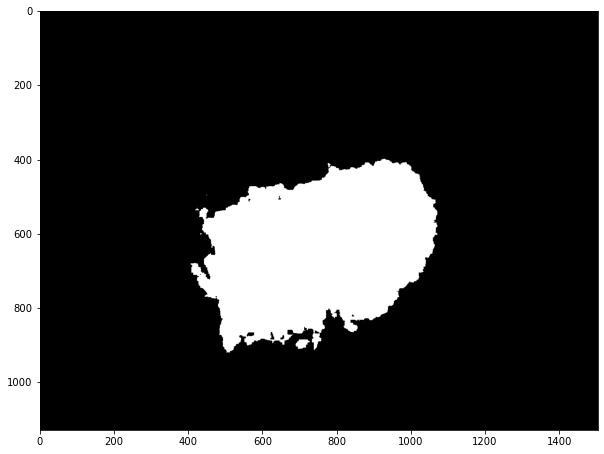

38
0.7879990336724046


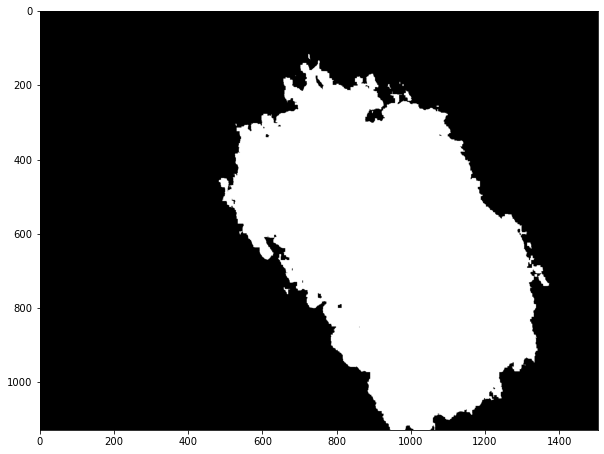

39
0.8241482779108704


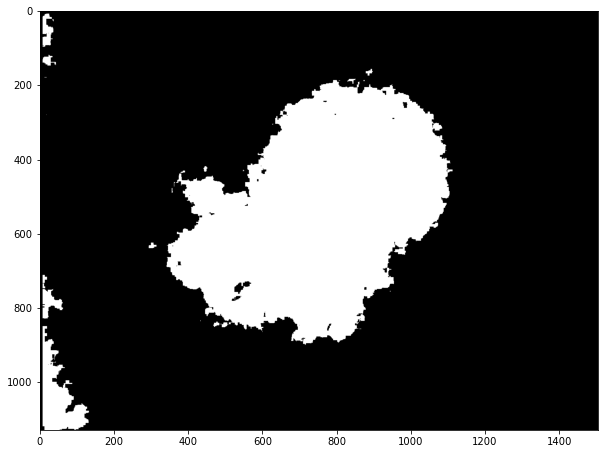

40
0.5815021875471453


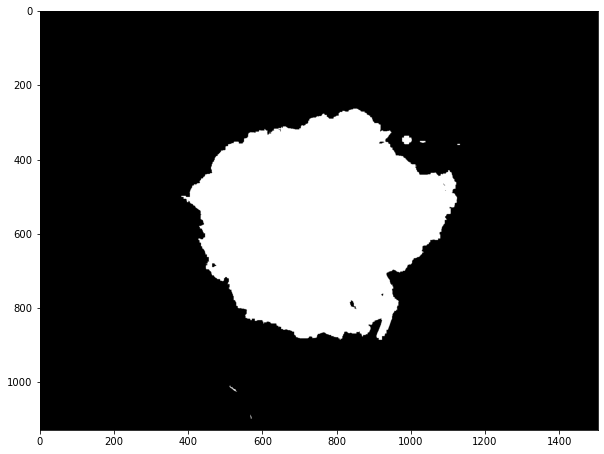

41
0.5867772627470114


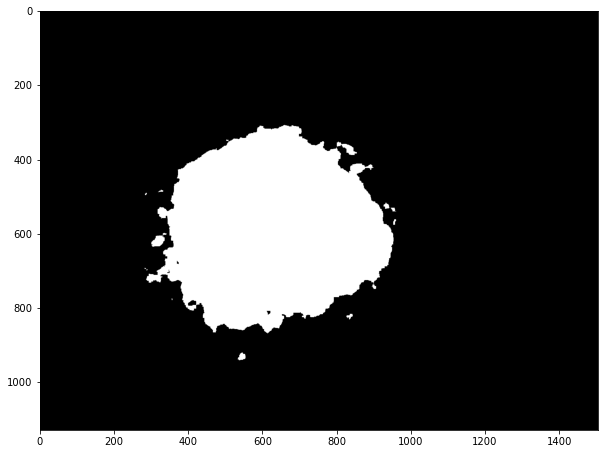

42
0.4544885158611976


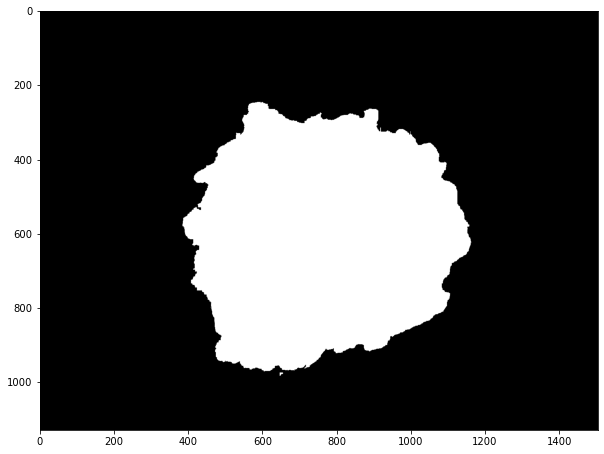

43
0.8648432850519843


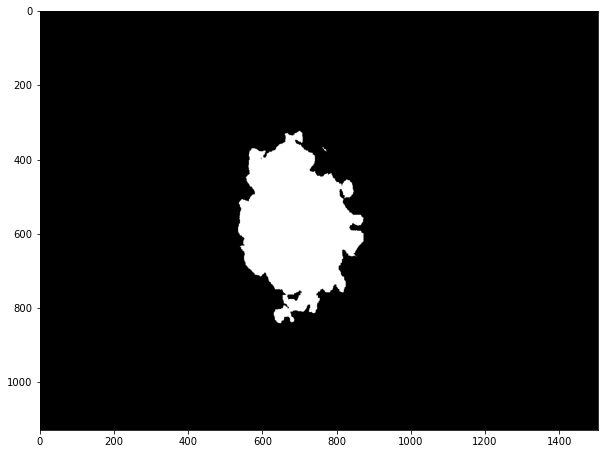

44
0.8672180163072899


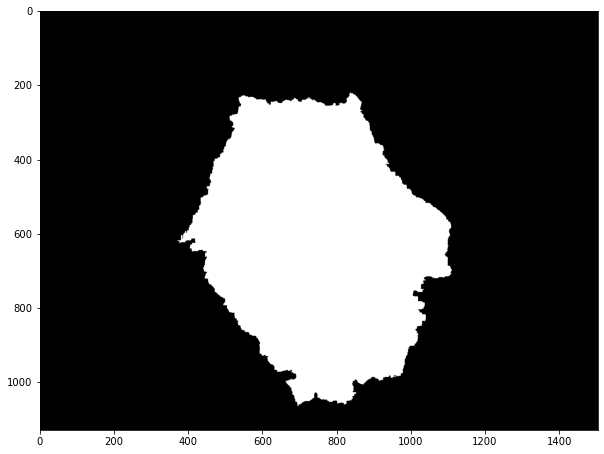

45
0.701167050080423


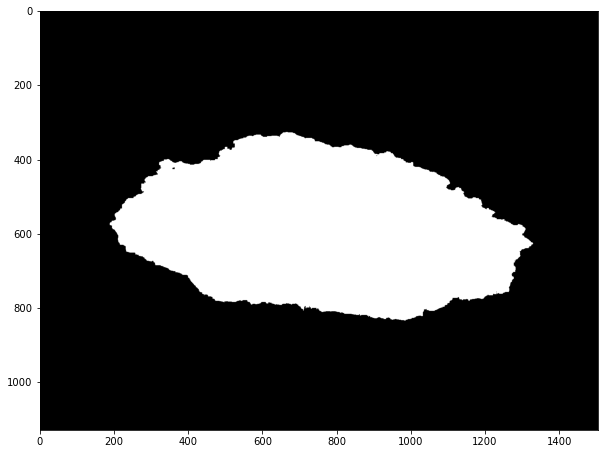

46
0.9457041600545341


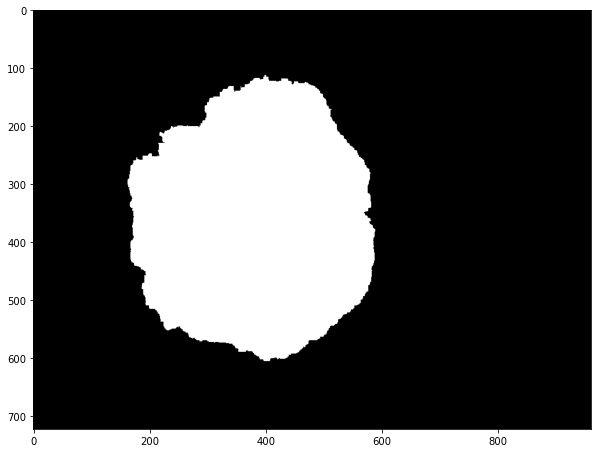

47
0.9073301255448694


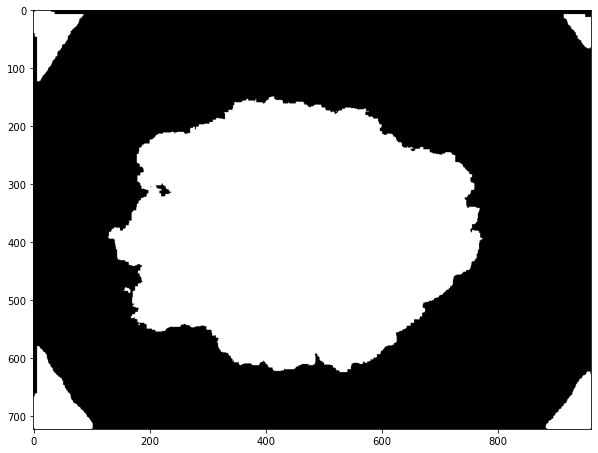

48
0.8937792810340314


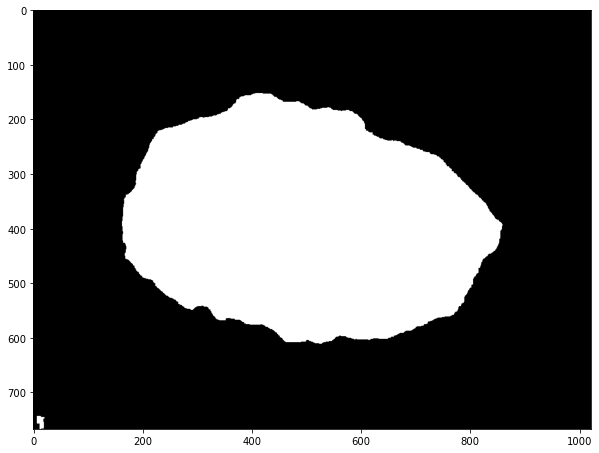

49
0.9230051141334767


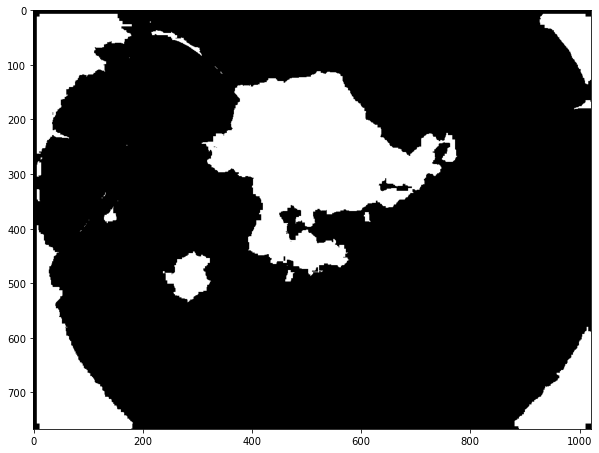

50
0.39252260581324555


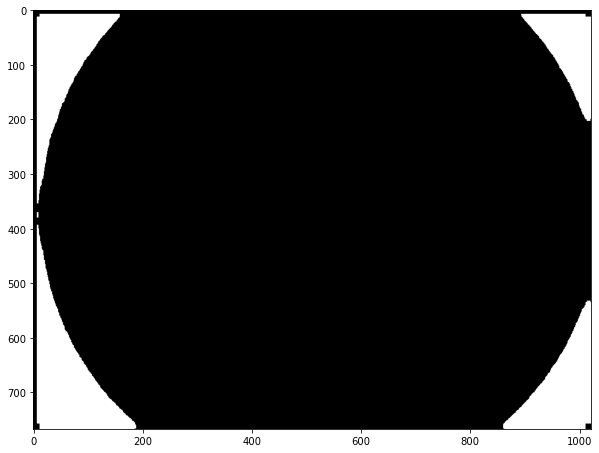

51


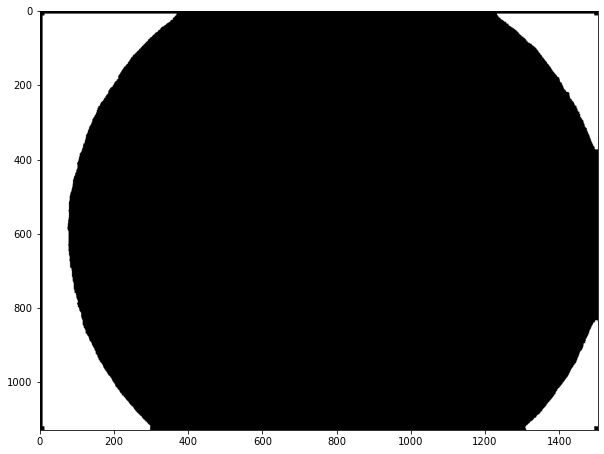

52


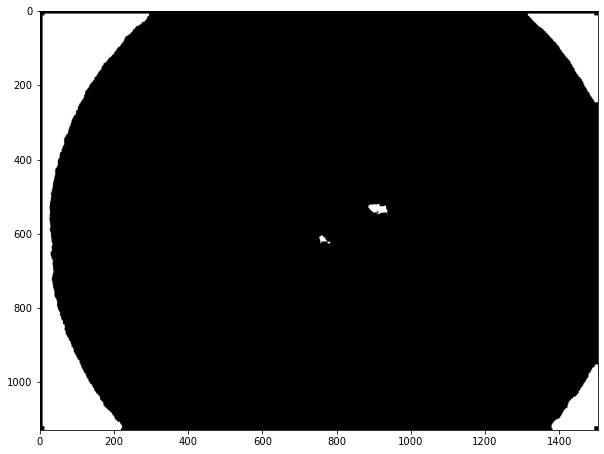

53
0.007335856376823605


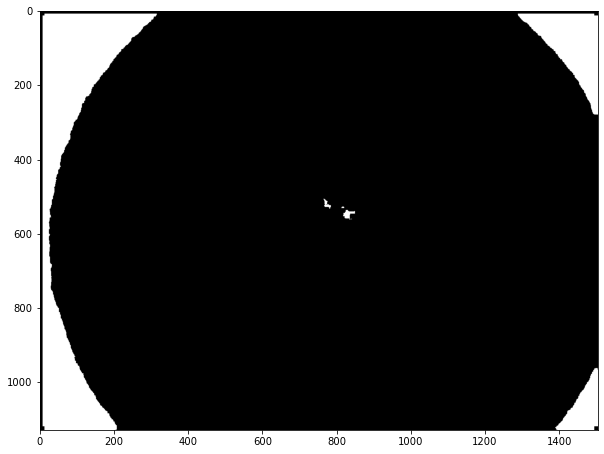

54
0.005412630571461575


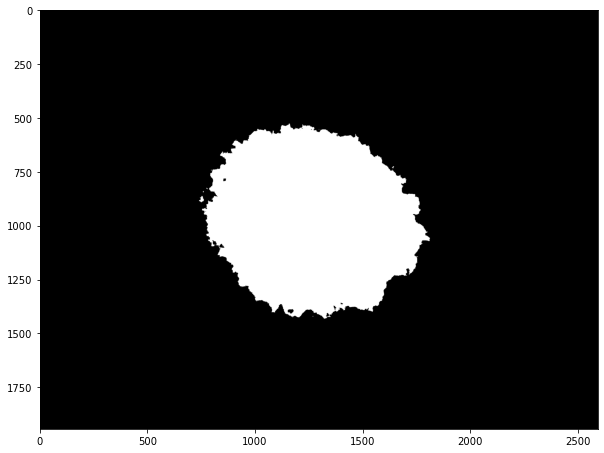

55
0.8399622396158943


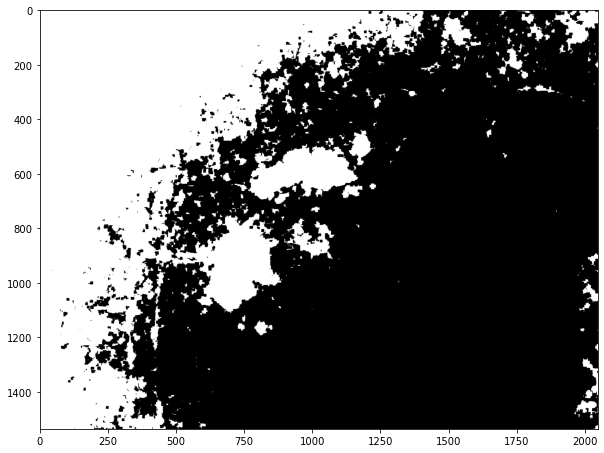

56
0.19305142588910829


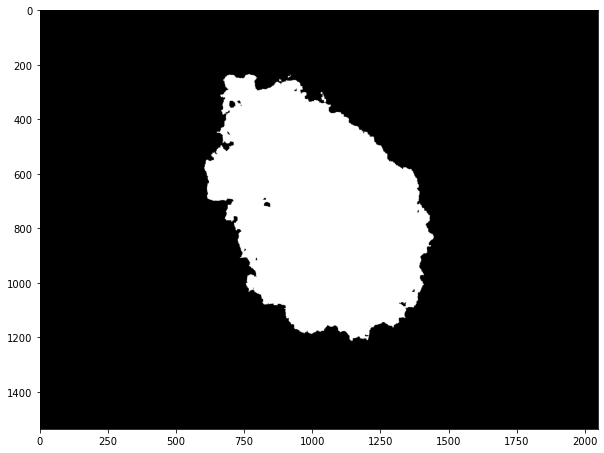

57
0.7952254843347373


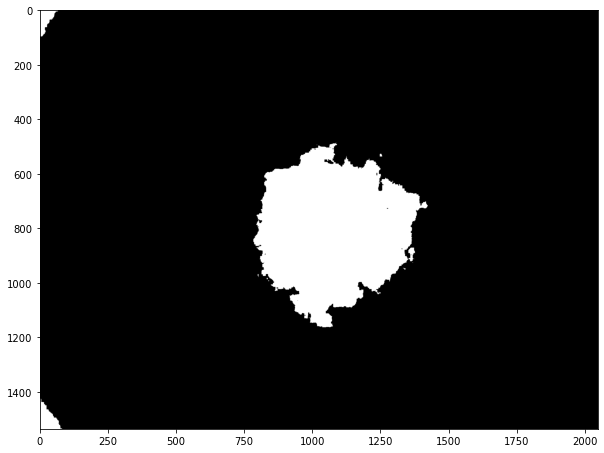

58
0.786426781918112


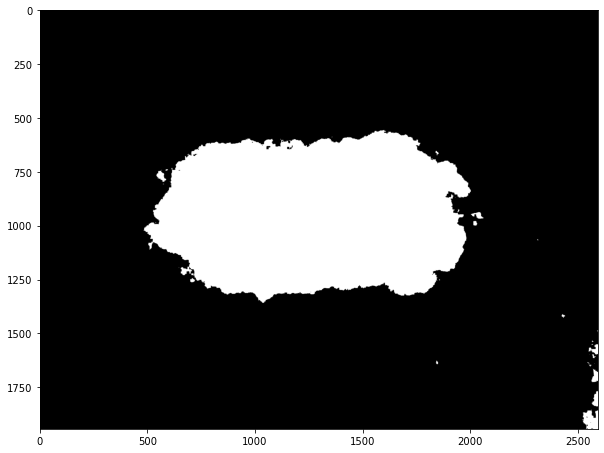

59
0.8686078153134353


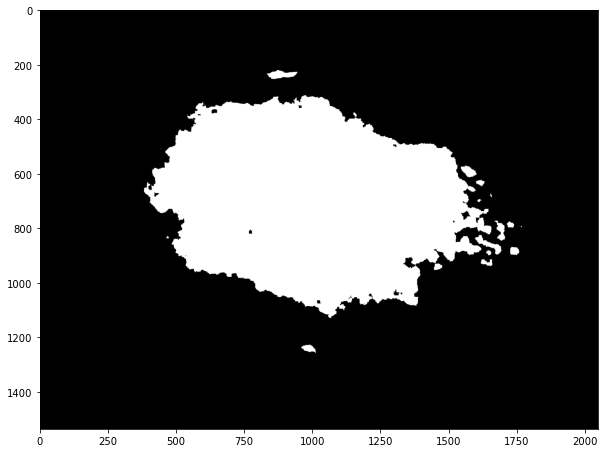

60
0.7154998971775774


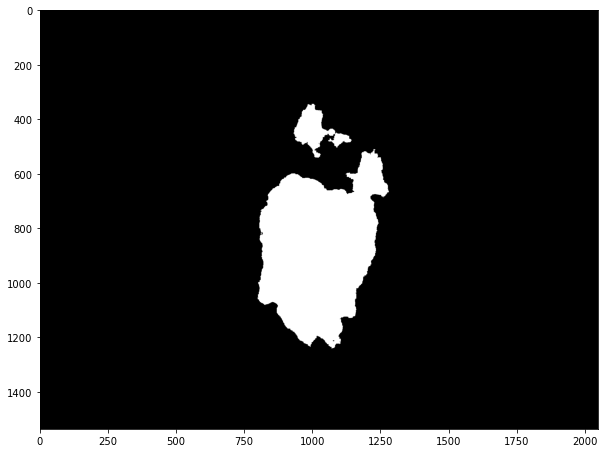

61
0.7613415235327695


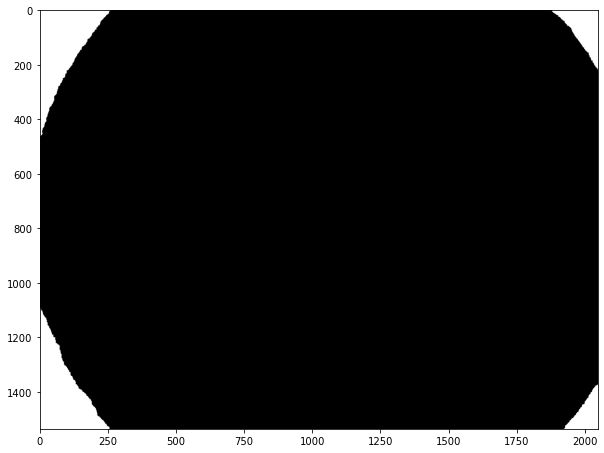

62


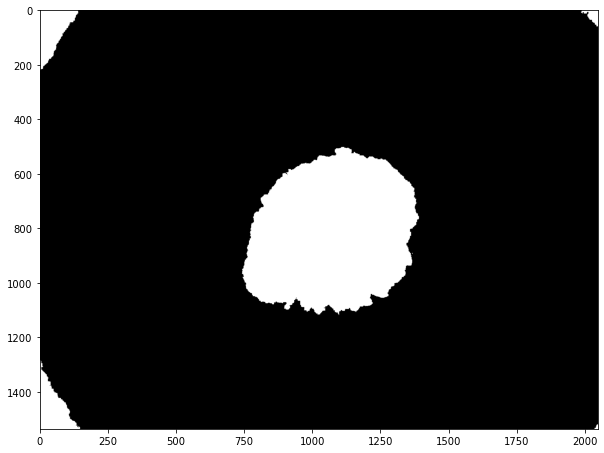

63
0.8750567069385417


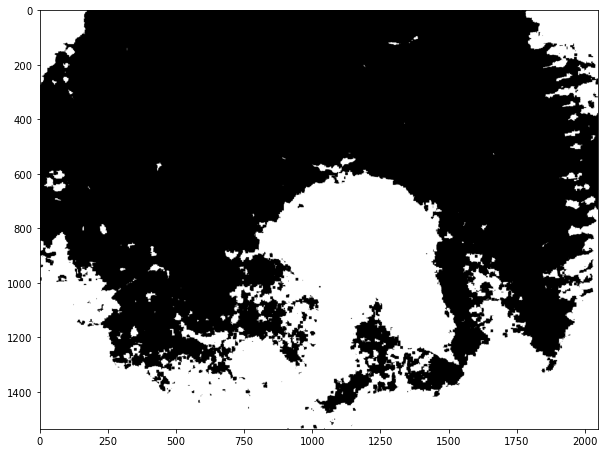

64
0.2629936356777043


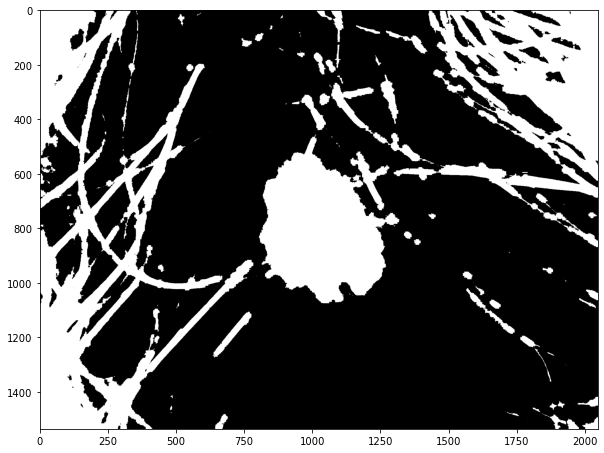

65
0.3337863318850314


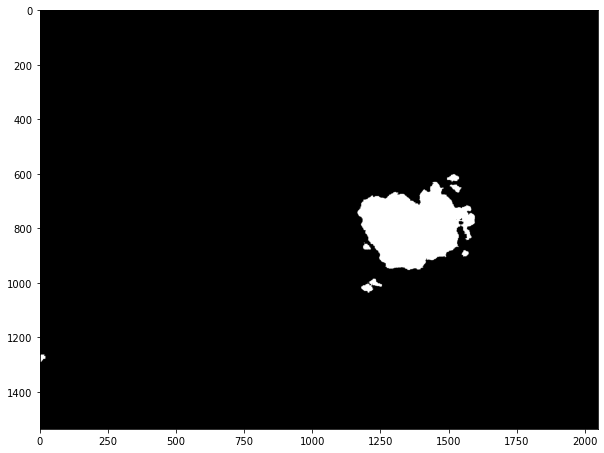

66
0.18835934514117578


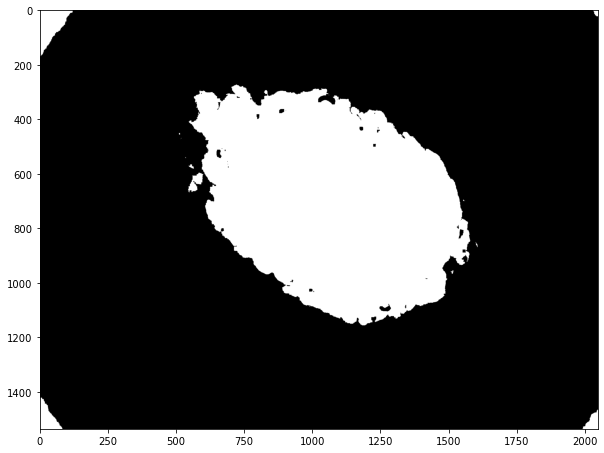

67
0.8847016650916706
67


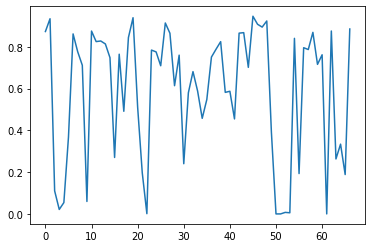

Puntaje promedio: 0.58777137194038


In [16]:
images = imread_collection('lesiones/*.jpg')
correct = imread_collection('ground_truth/*.png')

all_images = zip(images, correct)
c = 0

f_media = []

for imagen,ideal in all_images:
  c = c +1
  bin = algoritmo(imagen)
  plt.imshow(bin, cmap='gray')
  plt.show()
  print(c)
  

  f_score(bin, ideal)


Test = len(f_media)
print(Test)
plt.plot(f_media)
plt.show()
f_media = np.mean(f_media)
print(f"Puntaje promedio: {f_media}")